# Testing Slope Fitting on Synthetic PSDs

In [12]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [13]:
from slf.fit import *

from slf.utils import extract_psd
from slf.fit import _check

In [14]:
# Import FOOF (use sys to add location to path, then import)
import sys
sys.path.append('/Users/thomasdonoghue/Documents/GitCode/')
from foof.fit import FOOF
from foof import syn

In [15]:
# Generate synthetic PS
fs, psd = syn.mfonef(
    mf=[10],
    mf_sig=[1],
    mk=[0.2],
    chi=1,
    f0=3,
    fmax=40,
    res=0.5,
    noi=0.05
)

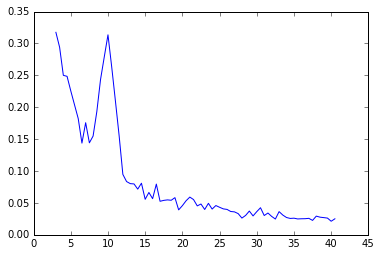

In [16]:
plt.plot(fs, psd)

In [17]:
fsl_rlm(fs, psd)

-1.0807275266978686

In [18]:
fsl_rlm_alph(fs, psd)

-1.0336984384903543

In [19]:
fsl_rlm_oscs(fs, psd)

-1.0807275266978686

In [20]:
fsl_ransac(fs, psd)

-1.0701543334012837

In [21]:
fsl_ransac_alph(fs, psd)

-1.0306634104610448

In [22]:
fsl_ransac_oscs(fs, psd)

-1.0701543334012837